In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
model = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                    

In [4]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.5 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.8/39.5 MB 3.2 MB/s eta 0:00:12
   -- ------------------------------------- 2.6/39.5 MB 3.4 MB/s eta 0:00:11
   --- ------------------------------------ 3.7/39.5 MB 3.9 MB/s eta 0:00:10
   ---- ----------------------------------- 4.7/39.5 MB 4.1 MB/s eta 0:00:09
   ------ --------------------------------- 6.0/39.5 MB 4.4 MB/s eta 0:00:08
   ------- -------------------------------- 7.3/39.5 MB 4.7 MB/s eta 0:00:07
   -------- ------------------------------- 8.7/39.5 MB 4.8 MB/s eta 0:00:07
   --------- ------------------------------ 9.7/39.5 MB 5.0 MB/s eta 0:00:07
   ----------- ---------------------------- 11.0/39.5 MB 5.0 MB/s eta 0:00:06
   ------------ --------------------------- 12.1/39.5 MB 5.1 MB/s eta 0:00:06
   --------

In [5]:
pip install opencv-python-headless==4.8.1.78

  Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.8.1.78-cp37-abi3-win_amd64.whl (38.0 MB)
Note: you may need to restart the kernel to use updated packages.


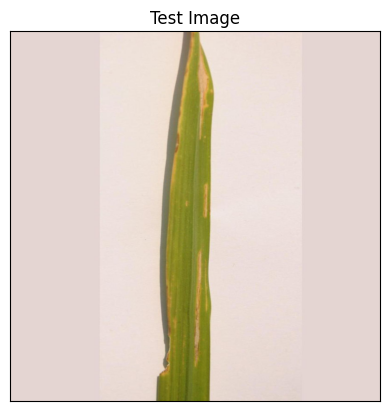

In [46]:
import cv2
import matplotlib.pyplot as plt

image_path = "test/test/bacterial_leaf_blight (178).JPG"
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found or failed to load.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Test Image")
    plt.xticks([])
    plt.yticks([])
    plt.show()


In [47]:
 #Testing model

image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [48]:
prediction = model.predict(input_arr)
prediction, prediction.shape

1/1 [==============================] - 0s 79ms/step


(array([[8.59450042e-01, 7.95376971e-02, 5.57018095e-04, 6.00947998e-02,
         1.48734762e-04, 1.13017064e-04, 6.03972367e-05, 1.13903088e-05,
         1.76072499e-05, 9.38414087e-06]], dtype=float32),
 (1, 10))

In [25]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [42]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 72ms/step


(array([[2.4903471e-05, 4.4264769e-05, 5.2203970e-05, 5.2150528e-05,
         8.3509376e-06, 1.0702722e-05, 5.3255440e-04, 9.7767240e-01,
         1.8637467e-02, 2.9649795e-03]], dtype=float32),
 (1, 10))

In [49]:
result_index = np.argmax(prediction)
result_index

0

In [50]:
class_name=['Rice_Bacterial_leaf_blight',
 'Rice_BrownSpot',
 'Rice_Healthy',
 'Rice_LeafBlast',
 'Rice_LeafScald',
 'Rice_NarrowBrownSpot',
 'Wheat_BrownRust',
 'Wheat_Healthy',
 'Wheat_Septoria',
 'Wheat_YellowSmut']

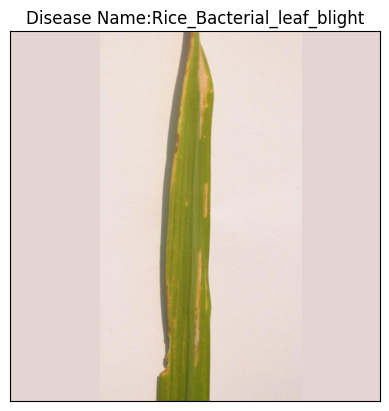

In [51]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name:{model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()